### ASTR 3970 / 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 15th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3.5 to 6.5. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to $\mu+\sigma_\mathrm{mean}$ and $\mu-\sigma_\mathrm{mean}$. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.5 to 5.5. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6.1\pm0.25$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6.1$ with standard deviation of $0.25$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

NOTE:

I think there are a few places in this homework where my choice of grid to plot for the different posteriors was questionable. I think what I did was correct for the most part, but it did not allow for the best, direct comparison of the models because of the grid choices. Please let me know if you can clarify what I may have done incorrectly. The mean values I was getting were making sense along the way and how the priors differed in their effects on the likelihood. I think an issue was how I took the range of the uniform priors as only the non-zero range and ignored the zeros in other parts when I was making a grid for plotting some of the posteriors. This might have caused comparison between models to be a bit wonky. You will see once you get to part 7 with the multiple plots that I ought to have changed my grid ranges (I used the uniform ranges for the priors, I mean the ranges for plotting the posteriors)

### Solution

In [1]:
# PART 1

from matplotlib import pyplot as plt
import numpy as np

filename = "/Users/harvir_d/NEW_repos/astr_8070_s25/coursework/homeworks/hw_data/hw4_data_1.npy" # file path
data = np.load(filename) # easy to load multivariate data if from a numpy file

measurements = data[:,0] # extracting column at a time
uncertainties = data[:,1]

print(data)

numerator = np.sum(measurements / (uncertainties**2)) # we can apply element wise operations row by row in our data
denominator = np.sum(1 / (uncertainties**2))

sample_mean = numerator / denominator

sample_error_mean = (np.sum(1 / (uncertainties**2)))**(-0.5)

print("The sample mean computed analytically is: %.4f V" % sample_mean)
print("The sample error of the mean computed analytically is: %.4f V" % sample_error_mean)


[[4.36 2.24]
 [4.   1.94]
 [4.87 1.39]
 [5.64 2.55]
 [6.14 1.69]
 [5.92 1.38]
 [3.93 1.  ]
 [6.58 1.6 ]
 [3.78 1.  ]
 [5.84 1.  ]]
The sample mean computed analytically is: 4.9421 V
The sample error of the mean computed analytically is: 0.4302 V


In [2]:
# PART 2

# I realize I am not using a squared_loss function to get the best-fit mean like I did on hw3, below is an equivalent method but I understand if you deduct points for not doing the best-fit method explicitly

from scipy.stats import norm

xgrid = np.linspace(3.5,6.5,1000) # array space for possible mean values
L_single = np.ones((data.shape[0],1000)) # allocating array space for individual measurement likelihoods
for i in range(len(data)): # continuing loop through each paired data point
    L_single[i] = norm.pdf(xgrid,loc=data[i,0],scale=data[i,1]) # inidividual measurement likelihoods stored

L = np.prod(L_single,axis=0) # Likelihood for dataset as a whole

sorted_indices = np.argsort(L)[-1] # argsort rearranges array in ascending order, [-1] chooses the last value in array and that is the maximum likelihood value
print("The MLE for the mean is: %.4f V" % xgrid[sorted_indices])


The MLE for the mean is: 4.9414 V


SRT: I appreciate your creativity. Indeed, it's not the method I intended you to use, but it's also not incorrect. I will deduct one point since this will not scale to more complex problems. -1 point

The Bayesian evidence is:  3.853730616927324e-08
1.0


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/816832036.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/816832036.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/816832036.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  evidence = np.trapz(L*prior, mu_range) # trapezoid rule for numerical integration, ranging from 3.5 to 6.5 mean values for the likelihood function and the fixed 1/3 probability from the prior distribution
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/8

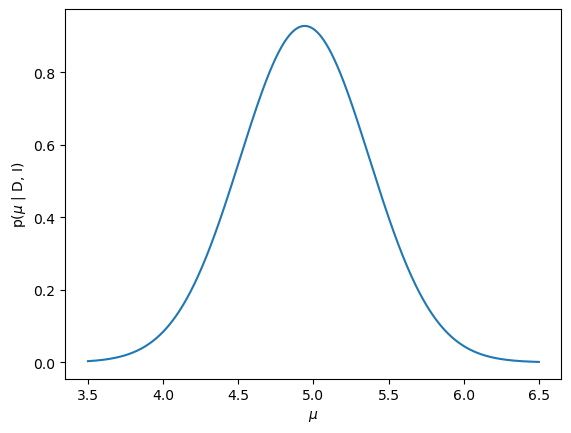

The maximum of the posterior given a uniform prior in range [3.5,6.5] is at mean value (the MAP): 4.9414 V


In [131]:
# PART 3

from matplotlib import pyplot as plt

prior = 1 / (6.5 - 3.5) # 1/3 probability constant value for any of our mean values in range of the uniform prior

mu_range = np.linspace(3.5,6.5,1000) # setting up range for numerical integration to get evidence 

evidence = np.trapz(L*prior, mu_range) # trapezoid rule for numerical integration, ranging from 3.5 to 6.5 mean values for the likelihood function and the fixed 1/3 probability from the prior distribution
print("The Bayesian evidence is: ",evidence) # small value

posterior = (L*prior)/evidence

check_normal = np.trapz(posterior,xgrid) # checking proper normalization of the posterior
print(check_normal)


plt.plot(xgrid,posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I)")
plt.show()


sorted_indices_posterior = np.argsort(posterior)[-1] # argsort rearranges array in ascending order, [-1] chooses the last value in array and that is the maximum likelihood value
print("The maximum of the posterior given a uniform prior in range [3.5,6.5] is at mean value (the MAP): %.4f V" % xgrid[sorted_indices_posterior])



SRT: The only issue here (which propagates into following work) is that your prior pdf does not go to zero outside the range. You have the flat value fine, but not the behavior. -2 points.

The bounds of the 68.3 percent confidence interval are: 4.5106 V and 5.3710 V


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3097506135.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3097506135.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3097506135.py:24: SyntaxWarning: invalid escape sequence '\m'
  print("$\mu$ + $\sigma$ = ", round(xgrid[sorted_indices_posterior] + sigma_part_four,4))
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3

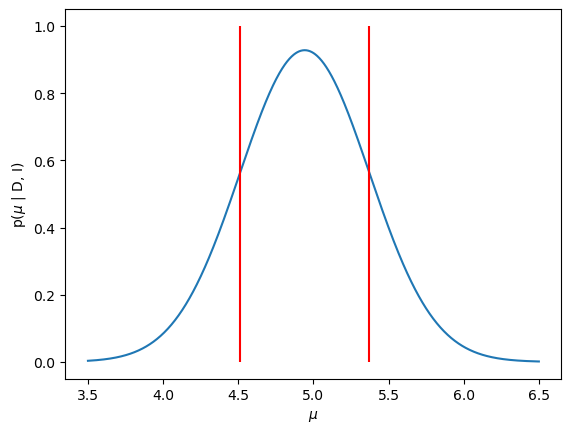

$\mu$ + $\sigma$ =  5.3702
$\mu$ - $\sigma$ =  4.5127


In [20]:
# PART 4

"""Figure out percentiles for 68.3 % confidence interval
100 % - 68.3 % = 31.7 % --> 31.7% / 2 = 15.85 % for equal tailed interval
This means we have a 15.85th percentile and a 100-15.85 = 84.15th percentile bounding the interval"""

posterior_cdf = np.cumsum(posterior) * np.diff(mu_range, prepend=mu_range[0]) # calculating cdf but taking cumulative sum of posterior and multiplying by steps in the mean range

lower_bound = np.interp(0.1585, posterior_cdf, mu_range)  # 15.85th percentile mean value, using this interpolation function to determine what value of the mean we have in the range when the cdf reaches 0.1585
upper_bound = np.interp(0.8415, posterior_cdf, mu_range)  

print("The bounds of the 68.3 percent confidence interval are: %.4f V and %.4f V" % (lower_bound,upper_bound))

plt.plot(xgrid,posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I)")
plt.vlines(lower_bound,ymin=0,ymax=1,color='r')
plt.vlines(upper_bound,ymin=0,ymax=1,color='r')
plt.show()

# We have already found the mean value using the sorted indices from earlier, we just need to compute the standard deviation of the posterior 
sigma_part_four = np.sqrt(np.sum((mu_range - xgrid[sorted_indices_posterior]) ** 2 * posterior) * np.diff(mu_range).mean())

print("$\mu$ + $\sigma$ = ", round(xgrid[sorted_indices_posterior] + sigma_part_four,4))
print("$\mu$ - $\sigma$ = ", round(xgrid[sorted_indices_posterior] - sigma_part_four,4))

SRT: Very good.

The Bayesian evidence is:  3.8537306169273256e-08
1.0
The maximum of the posterior given a uniform prior in range [4.5,5.5] is at mean value (the MAP): 4.9805 V


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/84276112.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/84276112.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/84276112.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  short_evidence = np.trapz(L*short_prior, short_mu_range) # trapezoid rule for numerical integration, ranging from 4.5 to 5.5 mean values for the likelihood function and the fixed 1 probability from the prior distribution
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipyk

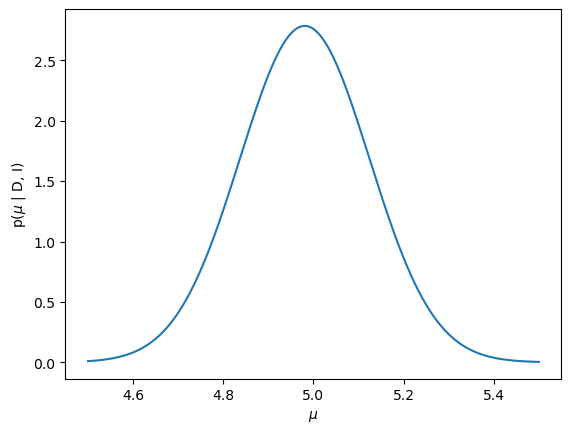

In [130]:
# PART 5 - Repeating (3) for short-range uniform prior

from matplotlib import pyplot as plt

short_prior = 1 / (5.5 - 4.5) # 1 probability constant value for any of our mean values in range of the uniform prior

short_mu_range = np.linspace(4.5,5.5,1000) # setting up range for numerical integration to get evidence 

short_evidence = np.trapz(L*short_prior, short_mu_range) # trapezoid rule for numerical integration, ranging from 4.5 to 5.5 mean values for the likelihood function and the fixed 1 probability from the prior distribution
print("The Bayesian evidence is: ",short_evidence)

short_posterior = (L*short_prior)/short_evidence

check_normalization = np.trapz(short_posterior,short_mu_range) # checking proper normalization of posterior
print(check_normalization)

plt.plot(short_mu_range,short_posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I)")

sorted_indices_short_posterior = np.argsort(short_posterior)[-1] # argsort rearranges array in ascending order, [-1] chooses the last value in array and that is the maximum likelihood value
print("The maximum of the posterior given a uniform prior in range [4.5,5.5] is at mean value (the MAP): %.4f V" % short_mu_range[sorted_indices_short_posterior])

SRT: No, you calcualted your likelihood values on the longer prior range above, so there is a mismatch in `L` and the new grid. And again, your prior does not have the behavior of dropping to zero. -4 points

The bounds of the 68.3 percent confidence interval are: 4.8369 V and 5.1237 V


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3922372203.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3922372203.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3922372203.py:20: SyntaxWarning: invalid escape sequence '\m'
  print("$\mu$ + $\sigma$ = ", round(short_mu_range[sorted_indices_short_posterior] + sigma_part_five,4))
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ip

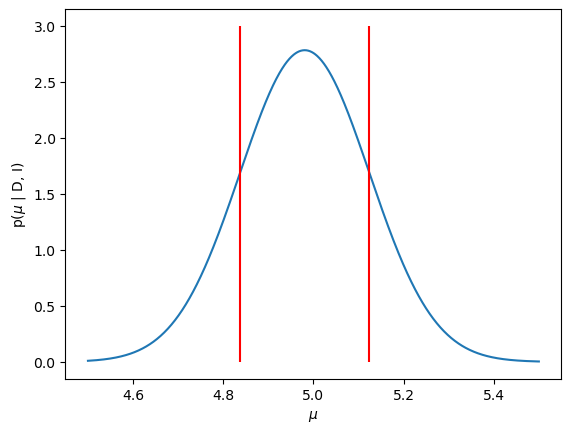

$\mu$ + $\sigma$ =  5.1234
$\mu$ - $\sigma$ =  4.8376


In [23]:
# PART 5 - Repeating (4)

short_posterior_cdf = np.cumsum(short_posterior) * np.diff(short_mu_range, prepend=short_mu_range[0]) # calculating cdf but taking cumulative sum of posterior and multiplying by steps in the mean range

lower_bound_part_five = np.interp(0.1585, short_posterior_cdf, short_mu_range)  # 15.85th percentile mean value, using this interpolation function to determine what value of the mean we have in the range when the cdf reaches 0.1585
upper_bound_part_five = np.interp(0.8415, short_posterior_cdf, short_mu_range)  

print("The bounds of the 68.3 percent confidence interval are: %.4f V and %.4f V" % (lower_bound_part_five,upper_bound_part_five))

plt.plot(short_mu_range,short_posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I)")
plt.vlines(lower_bound_part_five,ymin=0,ymax=3,color='r')
plt.vlines(upper_bound_part_five,ymin=0,ymax=3,color='r')
plt.show()

# We have already found the mean value using the sorted indices from earlier, we just need to compute the standard deviation of the posterior 
sigma_part_five = np.sqrt(np.sum((short_mu_range - short_mu_range[sorted_indices_posterior]) ** 2 * short_posterior) * np.diff(short_mu_range).mean())

print("$\mu$ + $\sigma$ = ", round(short_mu_range[sorted_indices_short_posterior] + sigma_part_five,4))
print("$\mu$ - $\sigma$ = ", round(short_mu_range[sorted_indices_short_posterior] - sigma_part_five,4))

SRT: Incorrect, but error carried through.

The Bayesian evidence is:  7.122778375482143e-08
1.0


<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2317398601.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2317398601.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2317398601.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  evidence = np.trapz(L*gaussian_prior_pdf, gauss_range) # trapezoid rule for numerical integration, this time we are not simply multiplying by a constant value
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2317398601.py:14: DeprecationWarning: `trapz

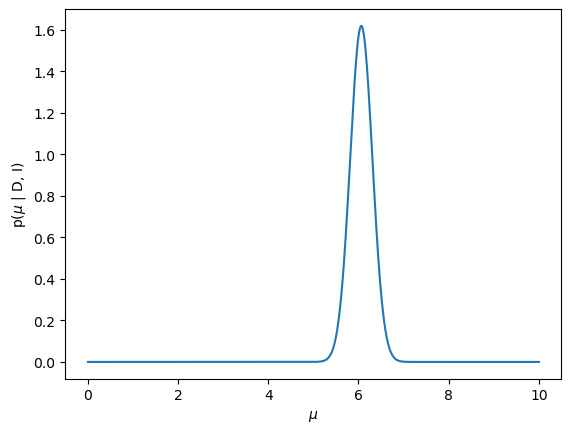

The maximum of the posterior given a Gaussian prior (6.1,0.25) is at mean value (the MAP): 6.0661 V


In [129]:
# PART 6 - Repeating (3)

gaussian_prior = norm(loc=6.1,scale=0.25) 

gauss_range = np.linspace(0,10,1000) # setting up range for numerical integration to get evidence 

gaussian_prior_pdf = gaussian_prior.pdf(gauss_range)

evidence = np.trapz(L*gaussian_prior_pdf, gauss_range) # trapezoid rule for numerical integration, this time we are not simply multiplying by a constant value
print("The Bayesian evidence is: ",evidence) 

gauss_posterior = (L*gaussian_prior_pdf)/evidence

check_normal_gauss = np.trapz(gauss_posterior,gauss_range) # checking proper normalization of the posterior
print(check_normal_gauss)


plt.plot(gauss_range,gauss_posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I)")
plt.show()


sorted_indices_gauss_posterior = np.argsort(gauss_posterior)[-1] # argsort rearranges array in ascending order, [-1] chooses the last value in array and that is the maximum likelihood value
print("The maximum of the posterior given a Gaussian prior (6.1,0.25) is at mean value (the MAP): %.4f V" % gauss_range[sorted_indices_gauss_posterior])

SRT: Almost, but not quite. The operations are fine overall. But you calculated `L` on a different grid of x values than what you calculated the prior on. So there is a mismatch when you do the array multiplication. -2 points.

The bounds of the 68.3 percent confidence interval are: 5.8104 V and 6.3033 V


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2976010971.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2976010971.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I)")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/2976010971.py:24: SyntaxWarning: invalid escape sequence '\m'
  print("$\mu$ + $\sigma$ = ", round(gauss_range[sorted_indices_gauss_posterior] + sigma_part_six,4))
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipyker

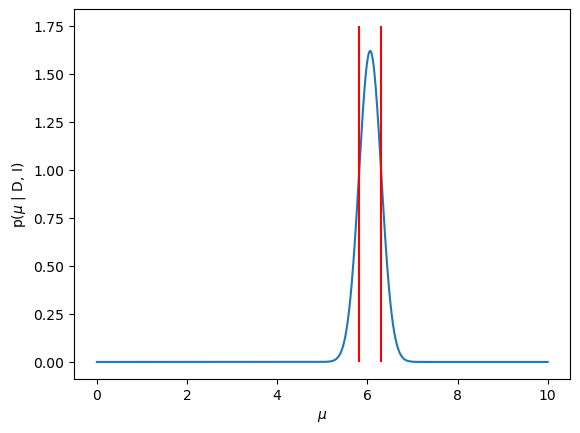

$\mu$ + $\sigma$ =  6.3124
$\mu$ - $\sigma$ =  5.8197


In [37]:
# PART 6 - Repeating (4)

"""Figure out percentiles for 68.3 % confidence interval
100 % - 68.3 % = 31.7 % --> 31.7% / 2 = 15.85 % for equal tailed interval
This means we have a 15.85th percentile and a 100-15.85 = 84.15th percentile bounding the interval"""

gauss_posterior_cdf = np.cumsum(gauss_posterior) * np.diff(gauss_range, prepend=gauss_range[0]) # calculating cdf but taking cumulative sum of posterior and multiplying by steps in the mean range

lower_bound_gauss = np.interp(0.1585, gauss_posterior_cdf, gauss_range)  # 15.85th percentile mean value, using this interpolation function to determine what value of the mean we have in the range when the cdf reaches 0.1585
upper_bound_gauss = np.interp(0.8415, gauss_posterior_cdf, gauss_range)  

print("The bounds of the 68.3 percent confidence interval are: %.4f V and %.4f V" % (lower_bound_gauss,upper_bound_gauss))

plt.plot(gauss_range,gauss_posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I)")
plt.vlines(lower_bound_gauss,ymin=0,ymax=1.75,color='r')
plt.vlines(upper_bound_gauss,ymin=0,ymax=1.75,color='r')
plt.show()

# We have already found the mean value using the sorted indices from earlier, we just need to compute the standard deviation of the posterior 
sigma_part_six = np.sqrt(np.sum((gauss_range - gauss_range[sorted_indices_gauss_posterior]) ** 2 * gauss_posterior) * np.diff(gauss_range).mean())

print("$\mu$ + $\sigma$ = ", round(gauss_range[sorted_indices_gauss_posterior] + sigma_part_six,4))
print("$\mu$ - $\sigma$ = ", round(gauss_range[sorted_indices_gauss_posterior] - sigma_part_six,4))

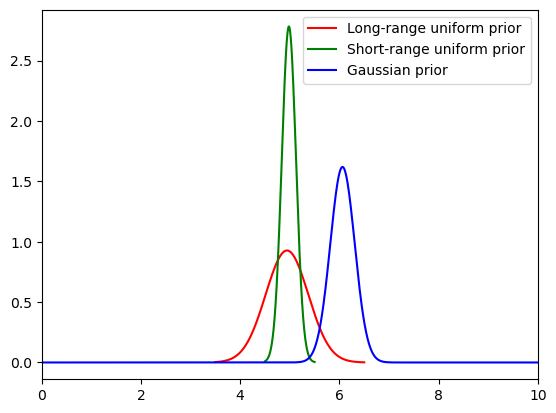

In [36]:
# PART 7


plt.plot(mu_range,posterior,color='r',label='Long-range uniform prior')
plt.plot(short_mu_range,short_posterior,color='g',label='Short-range uniform prior')
plt.plot(gauss_range,gauss_posterior,color='blue',label='Gaussian prior')
plt.xlim(0,10)

plt.legend()

In [128]:
# PART 8
evidence_delta = L[sorted_indices] # the evidence is simply the likelihood function evaluated at the best-fit mean from earlier because the delta function collapses the integral
print(evidence_delta)

# Bayes factor computed from ratio of evidences

bayesf = evidence_delta / evidence
print(bayesf) # based on this factor, using the delta model is not clearly favourable over the uniform prior (and there is no worthy evidence), makes sense since the delta prior should suffer a large penalty for its lack of flexibility

1.0725958079173822e-07
1.5058671649948365


SRT: This evidence value is correct. But the Bayes factor is not because you kept updating the `evidence` value and did not store the one the question asked out. -2 points

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [39]:
#Functions to do a polynomial fit, and compute the likelihood

from scipy.stats import norm 

def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum (t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in Lecture 9? 

### Solution

In [40]:
# PART 1

filename2 = "/Users/harvir_d/NEW_repos/astr_8070_s25/coursework/homeworks/hw_data/hw4_data_2.npy" # file path
data2 = np.load(filename2) # easy to load multivariate data if from a numpy file

print(data2)

[[ 0.42  0.72  0.    0.3   0.15  0.09  0.19  0.35  0.4   0.54  0.42  0.69
   0.2   0.88  0.03  0.67  0.42  0.56  0.14  0.2 ]
 [ 0.33  0.41 -0.25  0.01 -0.05 -0.05 -0.12  0.26  0.29  0.39  0.31  0.42
  -0.01  0.58 -0.2   0.52  0.15  0.32 -0.13 -0.09]
 [ 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1 ]]


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3606573126.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("$\mu$")
/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3606573126.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("p($\mu$ | D, I) (unnormalized)")


Text(0, 0.5, 'p($\\mu$ | D, I) (unnormalized)')

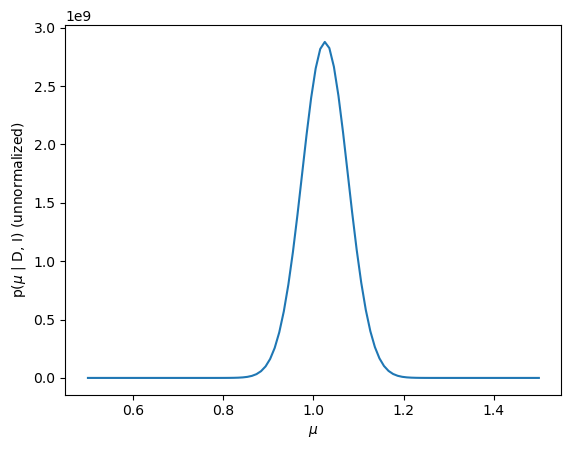

In [ ]:
# PART 2

theta_vector = [-0.23,1] # initialize theta vector for parameters that posterior varies over, 1 is a filler value and will be changed

slope_range = np.linspace(0.5,1.5,100) # grid size 100 for possible slope values we want to try in making our full likelihood distribution
likelihood = np.zeros_like(slope_range) # initializing likelihood distribution to a list which we later rewrite elements

for j,i in enumerate(slope_range): # enumerate creates a pair of values for each point of slope_range, it uses an integer counter to assign to each floating point value in the range, j is the counter here, i is the slope (floating point) value
    theta_vector[1] = i # looping through different values of slope
    log_likelihood_value = logL(theta_vector,data2)
    likelihood_value = np.exp(log_likelihood_value) # recovering likelihood from log-likelihood
    likelihood[j] = likelihood_value

prior_part2 = 1 / (1.5 - 0.5)
not_normalized_posterior = likelihood*prior_part2

plt.plot(slope_range,not_normalized_posterior)
plt.xlabel("$\mu$")
plt.ylabel("p($\mu$ | D, I) (unnormalized)")


SRT: Good!

In [48]:
# PART 3

part3_evidence = np.trapz(likelihood*prior_part2, slope_range) # trapezoid rule for numerical integration, this time we are not simply multiplying by a constant value
print("The Bayesian evidence is: ",part3_evidence) 

The Bayesian evidence is:  365684733.16065943


/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_33129/3315083511.py:3: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  part3_evidence = np.trapz(likelihood*prior_part2, slope_range) # trapezoid rule for numerical integration, this time we are not simply multiplying by a constant value


SRT: Good

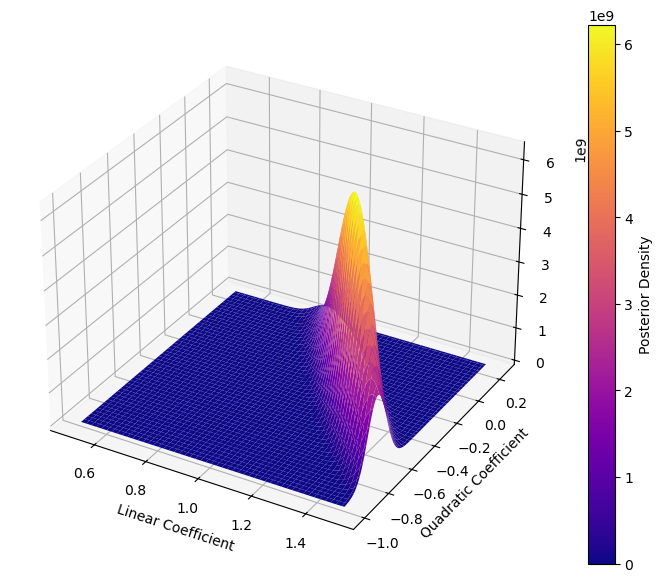

In [83]:
# PART 4

# Sorry about this inefficient nested loop structure. It is more clear to me what is happening with this and I don't understand the vectorized approaches that well in comparison. I'll come to office hours and see how i can redo this code

# Define parameter ranges
theta1_range = np.linspace(0.5, 1.5, 100)  # Linear coefficient range
theta2_range = np.linspace(-1, 0.25, 100)  # Quadratic coefficient range
theta_vector_with_quad = [-0.23,1,1] # declaring new vector to include quadratic coefficient
likelihood_part4 = np.zeros((100,100)) # declaring 2d array for likelihood

posterior_2d = np.zeros((len(theta1_range),len(theta2_range))) # declaring 2d array for posterior

for i,x in enumerate(theta1_range): # nested for loop for all combinations of slope and quadratic coefficients
    for j,y in enumerate(theta2_range): # x and y are the floating point values in the theta_1,2 ranges while i and j are integer counters in the loop for accessing the 2d array
        theta_vector_with_quad[1] = x  # Fixed y-intercept, varying linear term
        theta_vector_with_quad[2] = y # varying quadratic coefficient
        log_likelihood_value_part4 = logL(theta_vector_with_quad, data2)
        likelihood_value_part4 = np.exp(log_likelihood_value_part4)
        likelihood_part4[i][j] = likelihood_value_part4 # accessing 2d likelihood

        prior_theta1 = 1 / (1.5 - 0.5)  # Prior for linear coefficient
        prior_theta2 = 1 / (0.25 + 1)   # Prior for quadratic coefficient

        # Compute unnormalized posterior (likelihood × prior)
        posterior_2d[i][j] = likelihood_part4[i][j] * prior_theta1 * prior_theta2


# figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# grid of theta values
theta1_range, theta2_range = np.meshgrid(theta1_range, theta2_range)

# Plot the surface
surf = ax.plot_surface(theta1_range, theta2_range, posterior_2d.T, cmap='plasma', edgecolor='none')

# color bar to indicate posterior density
fig.colorbar(surf, ax=ax, label="Posterior Density")

ax.set_xlabel("Linear Coefficient")
ax.set_ylabel("Quadratic Coefficient")

plt.show()

SRT: OK, I would have preferred a flat colormap but this still looks correct.

In [114]:
# PART 5

# as you can see, I tried multiple methods first using np.trapz twice to do double integration and then using simpson's rule. Neither of these worked
# The issue I saw on forums and asking AI to troubleshoot this, was that since I had some values in my likelihood as very small I had numerical underflow with the integration (at least for np.trapz)
# I ended up using this dblquad method for straight-away double integration given a scalar value returned from a function, and specified ranges in the arguments. 
from scipy.integrate import dblquad

# Define the likelihood function for integration
def integrand(theta2, theta1):  
    theta_vector = [-0.23, theta1, theta2]  # Fixed y-intercept, varying linear and quadratic terms
    return np.exp(logL(theta_vector, data2))  # a scalar value from the likelihood

# Define prior bounds
theta1_min, theta1_max = 0.5, 1.5  # Linear coefficient prior bounds
theta2_min, theta2_max = -1, 0.25  # Quadratic coefficient prior bounds

# via double integral
evidence_2d, error = dblquad(integrand, theta1_min, theta1_max, lambda t1: theta2_min, lambda t1: theta2_max)

print("Bayesian Evidence:", evidence_2d)


"""
from scipy.integrate import simpson

# I am confused why using np.trapz twice is not working out like it has for single cases, I checked the printout of the inner integral by itself and it was also all zeros and not a scalar value
# there are many small values in evidence_integrand, but many large values as well, I am not sure why I am getting this array of zeros
prior_linear = 1/(1.5-0.5)
prior_quad = 1/(0.25+1)
evidence_integrand = likelihood_part4 * prior_linear * prior_quad

inside_integral = simpson(evidence_integrand)
print(inside_integral)

prior_linear = 1/(1.5-0.5)
prior_quad = 1/(0.25+1)
evidence_integrand = likelihood_part4 * prior_linear * prior_quad
print(evidence_integrand)
inside_integral = np.trapz(evidence_integrand,theta2_range,axis=1) # integrating first over the quadratic coefficient (first integral in double integral)
evidence_2d = np.trapz(inside_integral,theta1_range) # second integral
print("The Bayesian Evidence for the 2d likelihood x prior is: ",evidence_2d)
"""

Bayesian Evidence: 613090176.5746307


'\nfrom scipy.integrate import simpson\n\n# I am confused why using np.trapz twice is not working out like it has for single cases, I checked the printout of the inner integral by itself and it was also all zeros and not a scalar value\n# there are many small values in evidence_integrand, but many large values as well, I am not sure why I am getting this array of zeros\nprior_linear = 1/(1.5-0.5)\nprior_quad = 1/(0.25+1)\nevidence_integrand = likelihood_part4 * prior_linear * prior_quad\n\ninside_integral = simpson(evidence_integrand)\nprint(inside_integral)\n\nprior_linear = 1/(1.5-0.5)\nprior_quad = 1/(0.25+1)\nevidence_integrand = likelihood_part4 * prior_linear * prior_quad\nprint(evidence_integrand)\ninside_integral = np.trapz(evidence_integrand,theta2_range,axis=1) # integrating first over the quadratic coefficient (first integral in double integral)\nevidence_2d = np.trapz(inside_integral,theta1_range) # second integral\nprint("The Bayesian Evidence for the 2d likelihood x prior

SRT: What about the prior pdf in the integral? -2 points

In [115]:
# PART 6

# The Bayes factor is computed as simply the ratio of the evidences for the quadratic and linear models

bayes_factor = evidence_2d / part3_evidence
print(bayes_factor)

1.6765539301452776


ST: Very close but not totally correct.

This factor result indicates we are in the "barely worth mentioning" conclusion, which corroborates with the fact that, through the BIC in lecture 9, we determined the slightly more precise quadratic model is not worth the extra free parameter

SRT: Good

37/50